# Orbit Homework

Griffith Stites


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [151]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
year = UNITS.year

<Unit('year')>

In [182]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m
v_0 = 30330 * m / s

init = State(x = r_0,
             y = 0,
             vx = 0,
             vy = v_0)

,values
x,147000000000.0 meter
y,0
vx,0
vy,30330.0 meter / second


In [183]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m
t_end = 1 * year

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=t_end)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1 year


In [184]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    #Define r as a vector
    r = Vector(x, y)
    
    #r.mag is just the magnitude of the r Vector
    force = G * m1 * m2 / r.mag**2
    
    #Force is opposite the angle of the radius
    ForceX, ForceY = pol2cart(-r.angle, force)
    forceVector = Vector(ForceX, ForceY)
    
    return forceVector

In [185]:
universal_gravitation(init, system)

<Quantity([ 3.6686486e+22 -0.0000000e+00], 'newton')>

In [191]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    forceVector = universal_gravitation(state, system)
   
    dxdt = vx
    dydt = vy
    dvxdt = -forceVector.x / m2
    dvydt = -forceVector.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [192]:
# Always test the slope function!

slope_func(init, 0, system)

(0,
 <Quantity(30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(0.0, 'newton / kilogram')>)

In [193]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,116
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [194]:
results

,x,y,vx,vy
0.000000e+00,1.470000e+11,0.000000e+00,0.000000e+00,30330.000000
4.662755e-08,1.470000e+11,1.414214e-03,-2.864369e-10,30330.000000
5.129030e-07,1.470000e+11,1.555635e-02,-3.150805e-09,30330.000000
5.175658e-06,1.470000e+11,1.569777e-01,-3.179449e-08,30330.000000
5.180321e-05,1.470000e+11,1.571191e+00,-3.182313e-07,30330.000000
5.180787e-04,1.470000e+11,1.571333e+01,-3.182600e-06,30330.000000
5.180834e-03,1.470000e+11,1.571347e+02,-3.182629e-05,30330.000000
5.180838e-02,1.470000e+11,1.571348e+03,-3.182631e-04,30330.000000
5.180839e-01,1.470000e+11,1.571348e+04,-3.182632e-03,30330.000000
5.180839e+00,1.470000e+11,1.571348e+05,-3.182632e-02,30330.000000


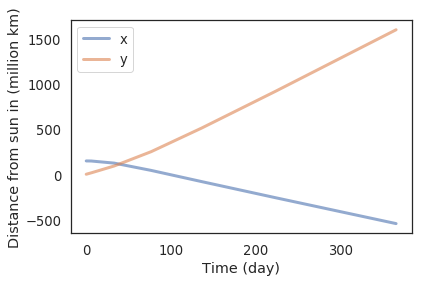

In [195]:
# Scaling the time steps to days
results.index /= 60 * 60 * 24

# Scaling the distance to million km
x = results.x / 1e9;
y = results.y / 1e9;

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun in (million km)')

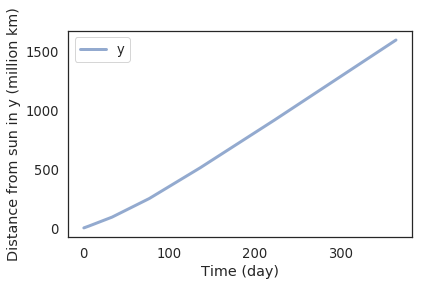

In [173]:
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun in y (million km)')